In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng
from lmfit.models import SineModel
from scipy.optimize import curve_fit
from typing import Optional
import sympy as sp
from sympy.plotting import plot3d
from components import point2d as p2
from components import point3d as p3
from components import antennaPair as antp
from components import antenna as ant
import itertools
import re
%matplotlib inline

In [438]:
TARGET_TAG = "E200 470F C1A0 6023 A8E6 010F"

In [439]:
RSSI0_FILE = "..//data//rssi_100cm.csv"

In [440]:
ACTUAL_DISTANCE = list(range(10, 210, 10))

In [441]:
FILE_LIST = [f"..//data//rssi_{d}cm.csv" for d in ACTUAL_DISTANCE]

In [442]:
def get_rssi_list(file:str) -> list:
    df = pd.read_csv(file)
    rssi_list = df["RSSI"].to_list()
    return rssi_list

def get_rssi0() -> float:
    df = pd.read_csv(RSSI0_FILE)
    return df["RSSI"].mean()

def get_distance_list():
    distance_list = []
    for file in FILE_LIST:
        rssi_list = get_rssi_list(file)
        distance_list.append([pow(10, (get_rssi0()-rssi)/15) * 100 for rssi in rssi_list])
    return distance_list

def get_distance_mean_list():
    distance_list = get_distance_list()
    return [np.mean(distance) for distance in distance_list]

def cul_rmse(measured_distance_list:list, actual_distance_list:list):
    rmse = np.sqrt(np.mean([pow(measured_distance_list[i]-actual_distance_list[i], 2) for i in range(0, len(measured_distance_list))]))
    return rmse

In [443]:
measured_distance_list = get_distance_list()
measured_distance_mean_list = get_distance_mean_list()
print(cul_rmse(measured_distance_mean_list, ACTUAL_DISTANCE))

68.89325553715646


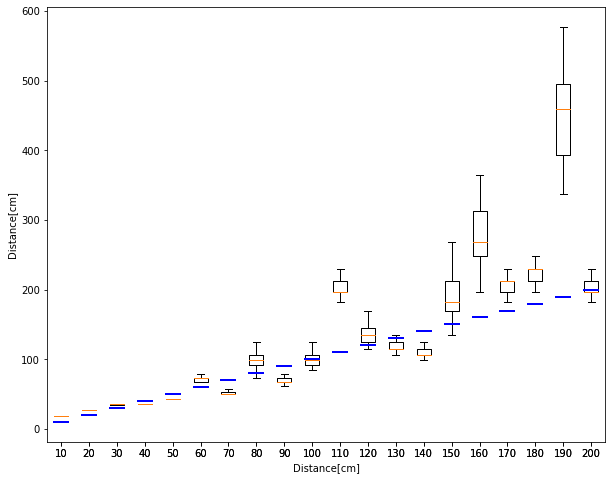

In [444]:
fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot(
    [[d] for d in ACTUAL_DISTANCE], 
    medianprops=dict(
        color='blue', 
        linewidth=2, 
    ),
    sym=''
)
ax.boxplot(
    measured_distance_list,
    sym='',
) 
ax.set_xticklabels(ACTUAL_DISTANCE + ACTUAL_DISTANCE)
ax.set_xlabel("Distance[cm]")
ax.set_ylabel("Distance[cm]")
plt.show()

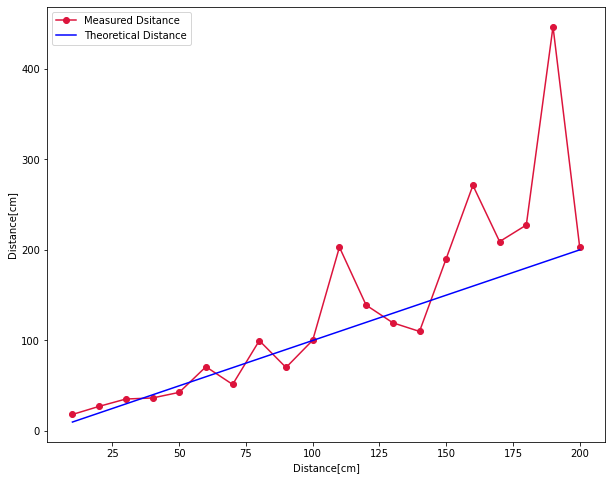

In [445]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(ACTUAL_DISTANCE, measured_distance_mean_list, marker="o", color="crimson", label="Measured Dsitance")
ax.plot(ACTUAL_DISTANCE, ACTUAL_DISTANCE, color="blue", label="Theoretical Distance")
ax.set_xlabel("Distance[cm]")
ax.set_ylabel("Distance[cm]")
plt.legend()